# Dimensionality Reduction
## PCA - Principal Component Analysis
### Starting point was a copy paste from the logistics regression notebook

In [2]:
#importing libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
#importing dataset
dataset=pd.read_csv('./../0. DataSets/9_PCA_Wine.csv')
dataset.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


## Business Problem explanation:

In [4]:
#We have a list of wine with all its different features..
#In the last column we have the customer segment that buys that wine.
#There are 3 customer segments

#We want to know what features explains the most the most the variants
#and depending on what variants you would like to be explained
#you will choose the right number of principal components.


In [5]:
dataset['Customer_Segment'].unique()

array([1, 2, 3])

In [6]:
X=dataset.iloc[:,0:13].values
y=dataset.iloc[:,13].values

In [7]:
#Splitting the dataset into the training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

#feature scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.transform(X_test)

In [8]:
#Applying PCA
from sklearn.decomposition import PCA

pca=PCA(n_components=None)
#n_components = number of features/principal components you want to get that explains the variants

X_train_pca_checker=pca.fit_transform(X_train)
X_test_pca_checker=pca.transform(X_test)

#the next vector has the % of variance explained by each of the principal components that we extracted with PCA
explained_variance = pca.explained_variance_ratio_

In [9]:
explained_variance

array([0.36884109, 0.19318394, 0.10752862, 0.07421996, 0.06245904,
       0.04909   , 0.04117287, 0.02495984, 0.02308855, 0.01864124,
       0.01731766, 0.01252785, 0.00696933])

In [10]:
#this explained_variance means that if we include one principal component it will explain 37% of the variances
#if we take 2, it will explain 37% + 19.3% = 56.xx% of the variance


In [11]:
#Now that I have seen that with 2 PCA I kind of explain the majority or enough of the data I can chose 2 at the n_components
pca=PCA(n_components=2)
X_train=pca.fit_transform(X_train)
X_test=pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_

In [33]:
X_train[0:5,]

#ou seja so vou ter 2 variaveis/colunas neste X_train

array([[-2.17884511, -1.07218467],
       [-1.80819239,  1.57822344],
       [ 1.09829474,  2.22124345],
       [-2.55584748, -1.66210369],
       [ 1.85698063,  0.24157317]])

In [14]:
#Fitting Logistic regression to the training set
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(random_state=0)
classifier.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [15]:
#predicting the test set results
y_pred=classifier.predict(X_test)

In [16]:
y_pred

array([1, 3, 2, 1, 2, 1, 1, 3, 2, 2, 3, 3, 1, 2, 3, 2, 1, 1, 2, 1, 2, 1,
       1, 2, 2, 2, 2, 2, 2, 3, 1, 1, 2, 1, 1, 1])

In [17]:
#Making the confusion Matrix

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_true=y_test,y_pred=y_pred)

In [19]:
cm

#the diagonals are the correct predictions (14,15,6)
#ou seja 14 vezes o resultado correcto era o segmento 1 e o modelo preveu 1... etc..
#o errao foi: 1 vez o modelo preveu segmento 1 mas era segmento 2

array([[14,  0,  0],
       [ 1, 15,  0],
       [ 0,  0,  6]])

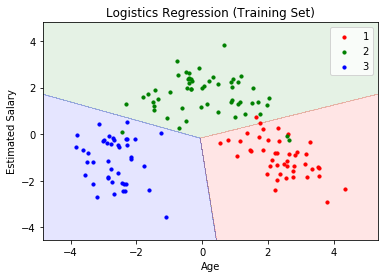

In [20]:
#Visualising the training set results
#Aqui tenho um quadrado dividido em verde e vermelho. Verde e a area que o meu classifier predicts que os users vao comprar
#Vermelho area que o classifier acha que o user nao vai comprar
#Os pontos sao o meu training set.
#Estao coloridos consoante esse user comprou (verde), ou nao comprou (vermelho)
#Se um ponto estiver na area verde mas estiver pintado a vermelho quer dizer que o classifier errou
#A confusion matrix acima diz isso mesmo (para o test set): quantos pontos estao na regiao verde e sao verdes =24, quantos estao na verde e sao vermelhors =3

from matplotlib.colors import ListedColormap
X_set, y_set=X_train,y_train
X1,X2=np.meshgrid(np.arange(start=X_set[:,0].min()-1,stop=X_set[:,0].max()+1,step=0.01),
                 np.arange(start=X_set[:,1].min()-1,stop=X_set[:,1].max()+1,step=0.01))

plt.contourf(X1,X2,classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
alpha=0.1,cmap=ListedColormap(('red','green','blue')))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())

for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set==j,0],X_set[y_set==j,1],
               c=ListedColormap(('red','green','blue'))(i),label=j,s=10)
plt.title("Logistics Regression (Training Set)")
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

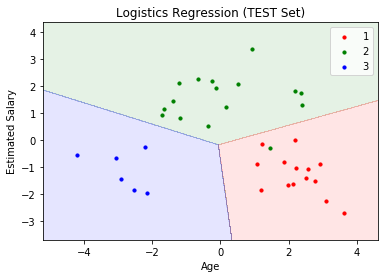

In [21]:
#Visualising the TEST set results
from matplotlib.colors import ListedColormap
X_set, y_set=X_test,y_test
X1,X2=np.meshgrid(np.arange(start=X_set[:,0].min()-1,stop=X_set[:,0].max()+1,step=0.01),
                 np.arange(start=X_set[:,1].min()-1,stop=X_set[:,1].max()+1,step=0.01))

plt.contourf(X1,X2,classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
alpha=0.1,cmap=ListedColormap(('red','green','blue')))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())

for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set==j,0],X_set[y_set==j,1],
               c=ListedColormap(('red','green','blue'))(i),label=j,s=10)
plt.title("Logistics Regression (TEST Set)")
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()